In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sys import platform

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [3]:
!pwd
load_dir = home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/'
print(load_dir)
fig_dir = home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/sim_figures/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs
/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/simulated/


In [4]:
single_param_dic_dir = load_dir+'sim_dics/sim_single_param_dics.csv'
double_param_dic_dir = load_dir+'sim_dics/sim_dual_param_dics.csv'
triple_param_dic_dir = load_dir+'sim_dics/sim_triple_param_dics.csv'
flat_param_dic_dir = load_dir+'sim_dics/sim_flat_model_dic.csv'

single_param_dics=pd.read_csv(single_param_dic_dir)
dual_param_dics=pd.read_csv(double_param_dic_dir)
triple_param_dics=pd.read_csv(triple_param_dic_dir)
flat_model_dic=pd.read_csv(flat_param_dic_dir)

In [5]:
single_param_model_names=['sim_a_alone', 'sim_v_alone', 'sim_tr_alone', 'sim_z_alone']
dual_param_model_names=['sim_a_v', 'sim_tr_v', 'sim_z_v']
triple_param_model_names=['sim_a_v_tr',  'sim_z_v_tr']
flat_model_name = ['flat_model']

In [6]:
all_dics = pd.concat([flat_model_dic, single_param_dics, dual_param_dics, triple_param_dics], axis=1)
all_dics.columns = all_dics.columns.str.strip()

In [7]:
flat_normalized_dics=all_dics.div(all_dics.flat_model, axis=0) 
flat_subtracted_dics=all_dics.subtract(all_dics.flat_model, axis=0) 

In [8]:
plotting_order = triple_param_model_names + dual_param_model_names + single_param_model_names + flat_model_name

In [9]:
all_dics

,flat_model,sim_a_alone,sim_v_alone,sim_tr_alone,sim_z_alone,sim_a_v,sim_tr_v,sim_z_v,sim_a_v_tr,sim_z_v_tr
0,-58109.348804,-58625.887918,-59694.307121,-59084.946079,-59056.616302,-60062.95016,-60586.646605,-60007.91337,-60859.175449,-60829.706551


In [10]:
y_min = np.min(all_dics.values) - 1000
y_max = np.max(all_dics.values) + 1000

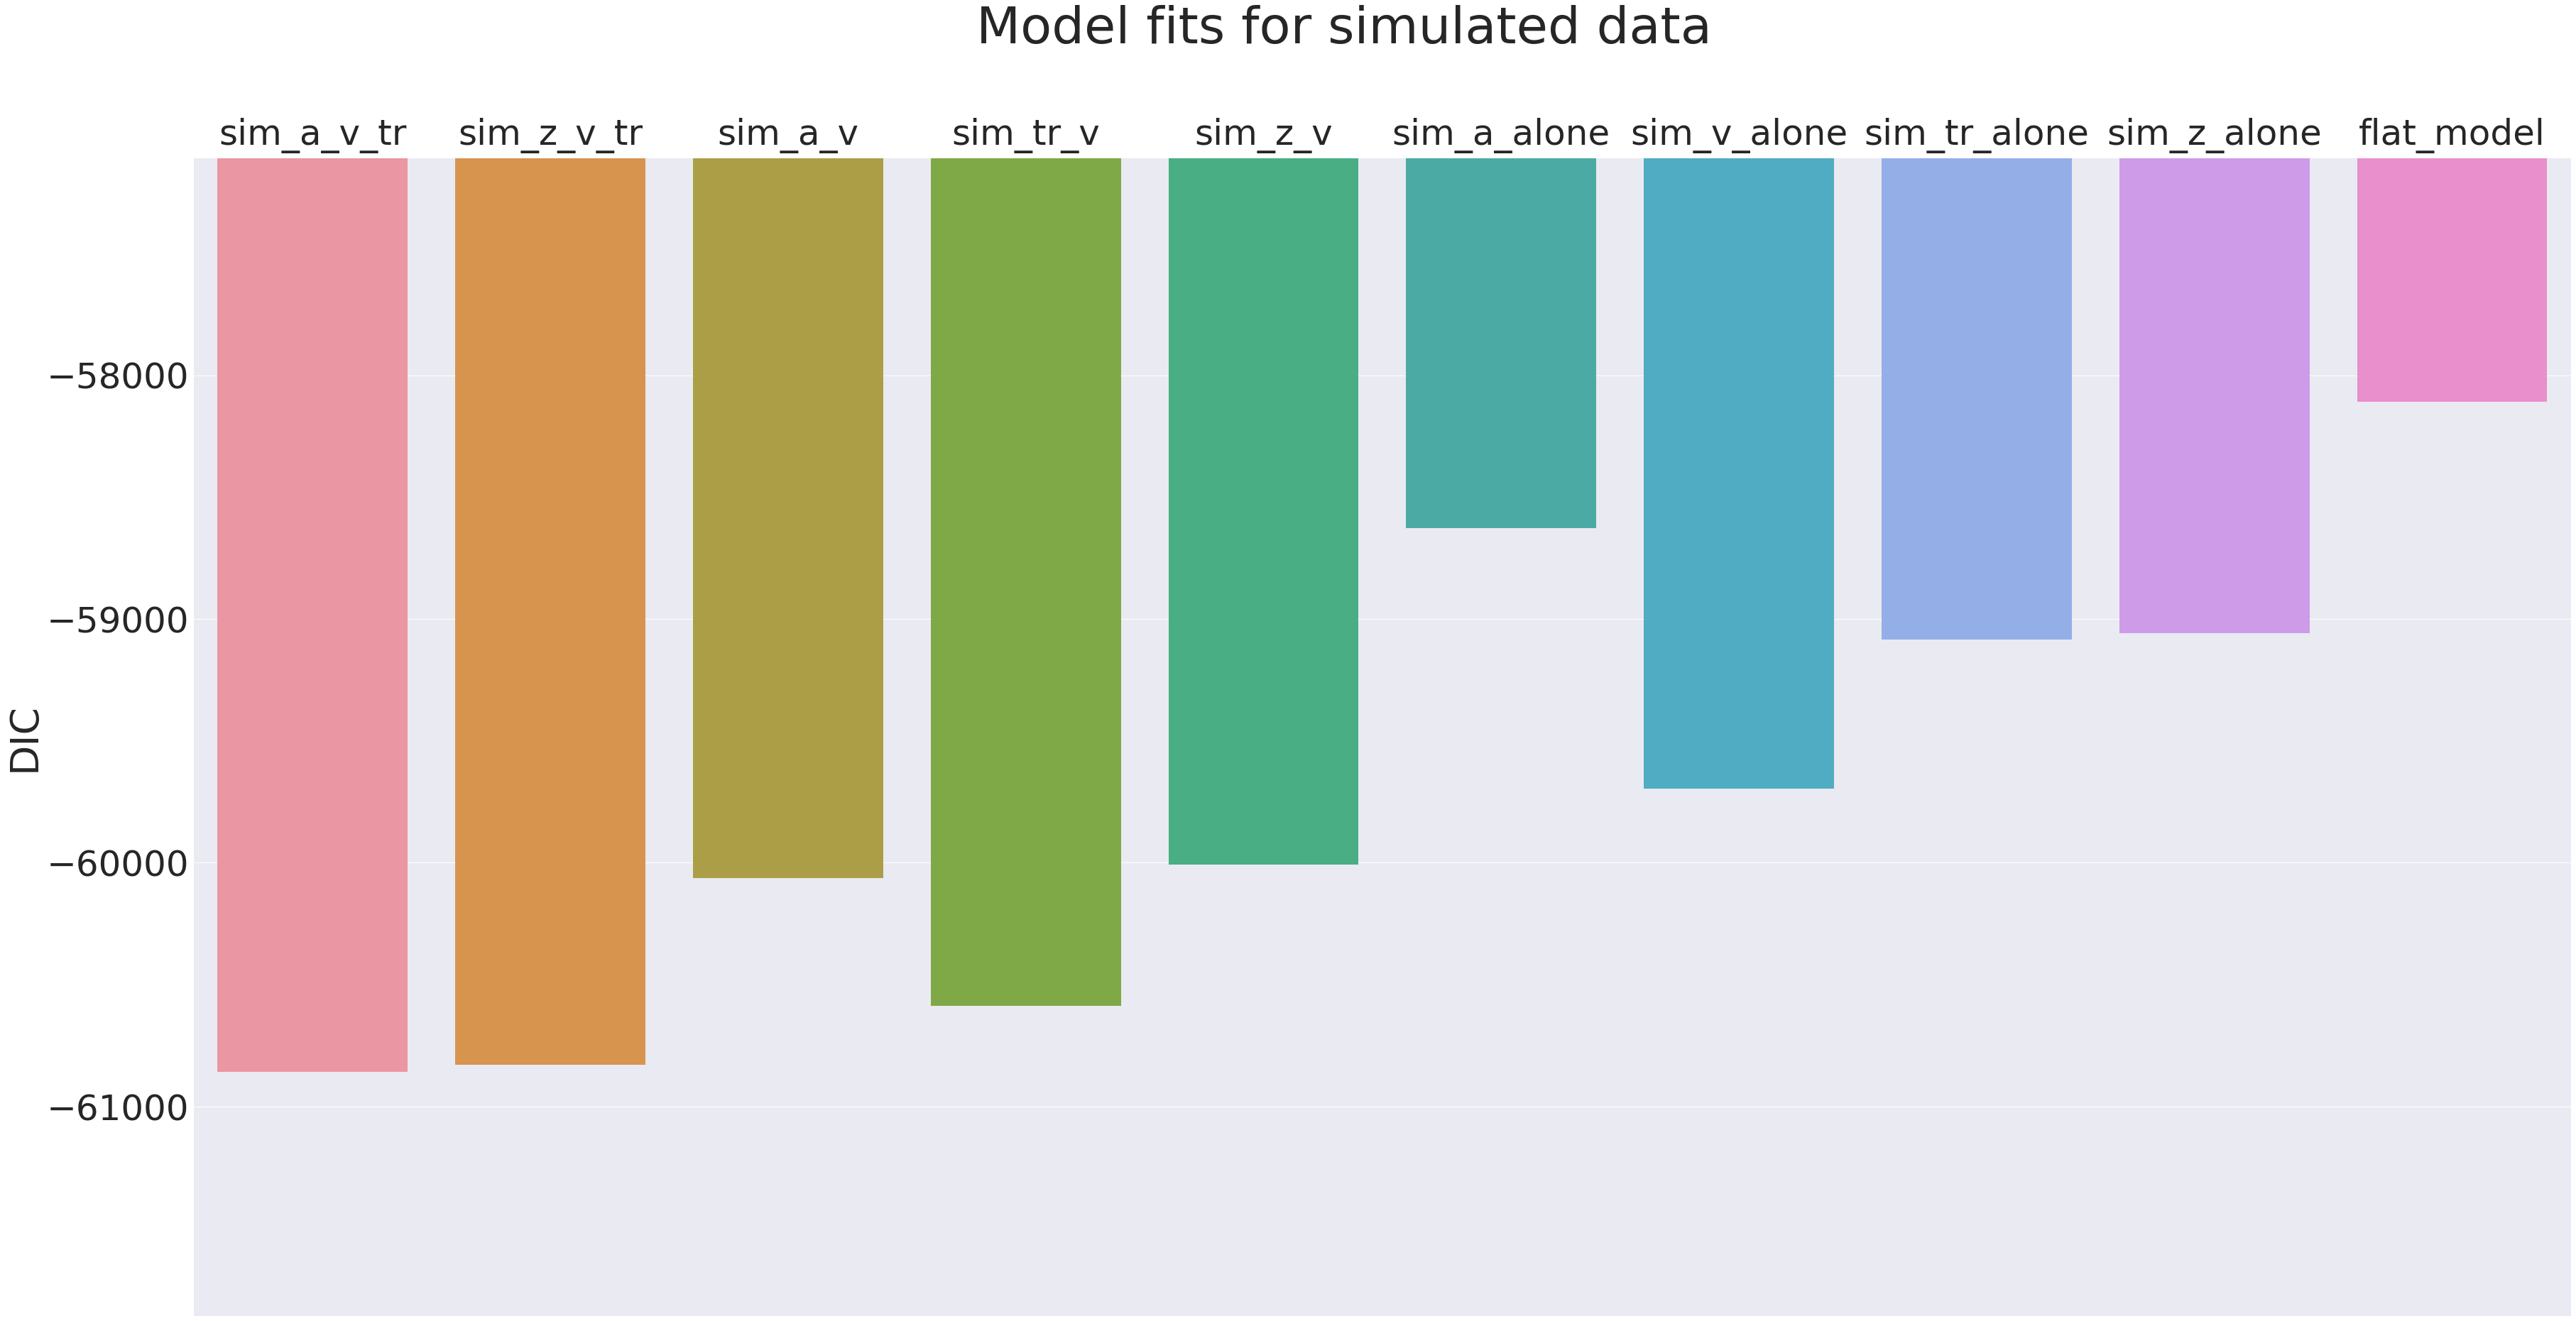

In [11]:
sns.set(font_scale=5)  
plt.figure(figsize=(60,30))
ax=sns.barplot(data=all_dics, order=plotting_order)
ax.set(ylabel='DIC')
plt.ylim(y_min, y_max)
ax.xaxis.tick_top()
plt.suptitle('Model fits for simulated data')
plt.savefig(fig_dir+'raw_sim_stepwise_dics.pdf')

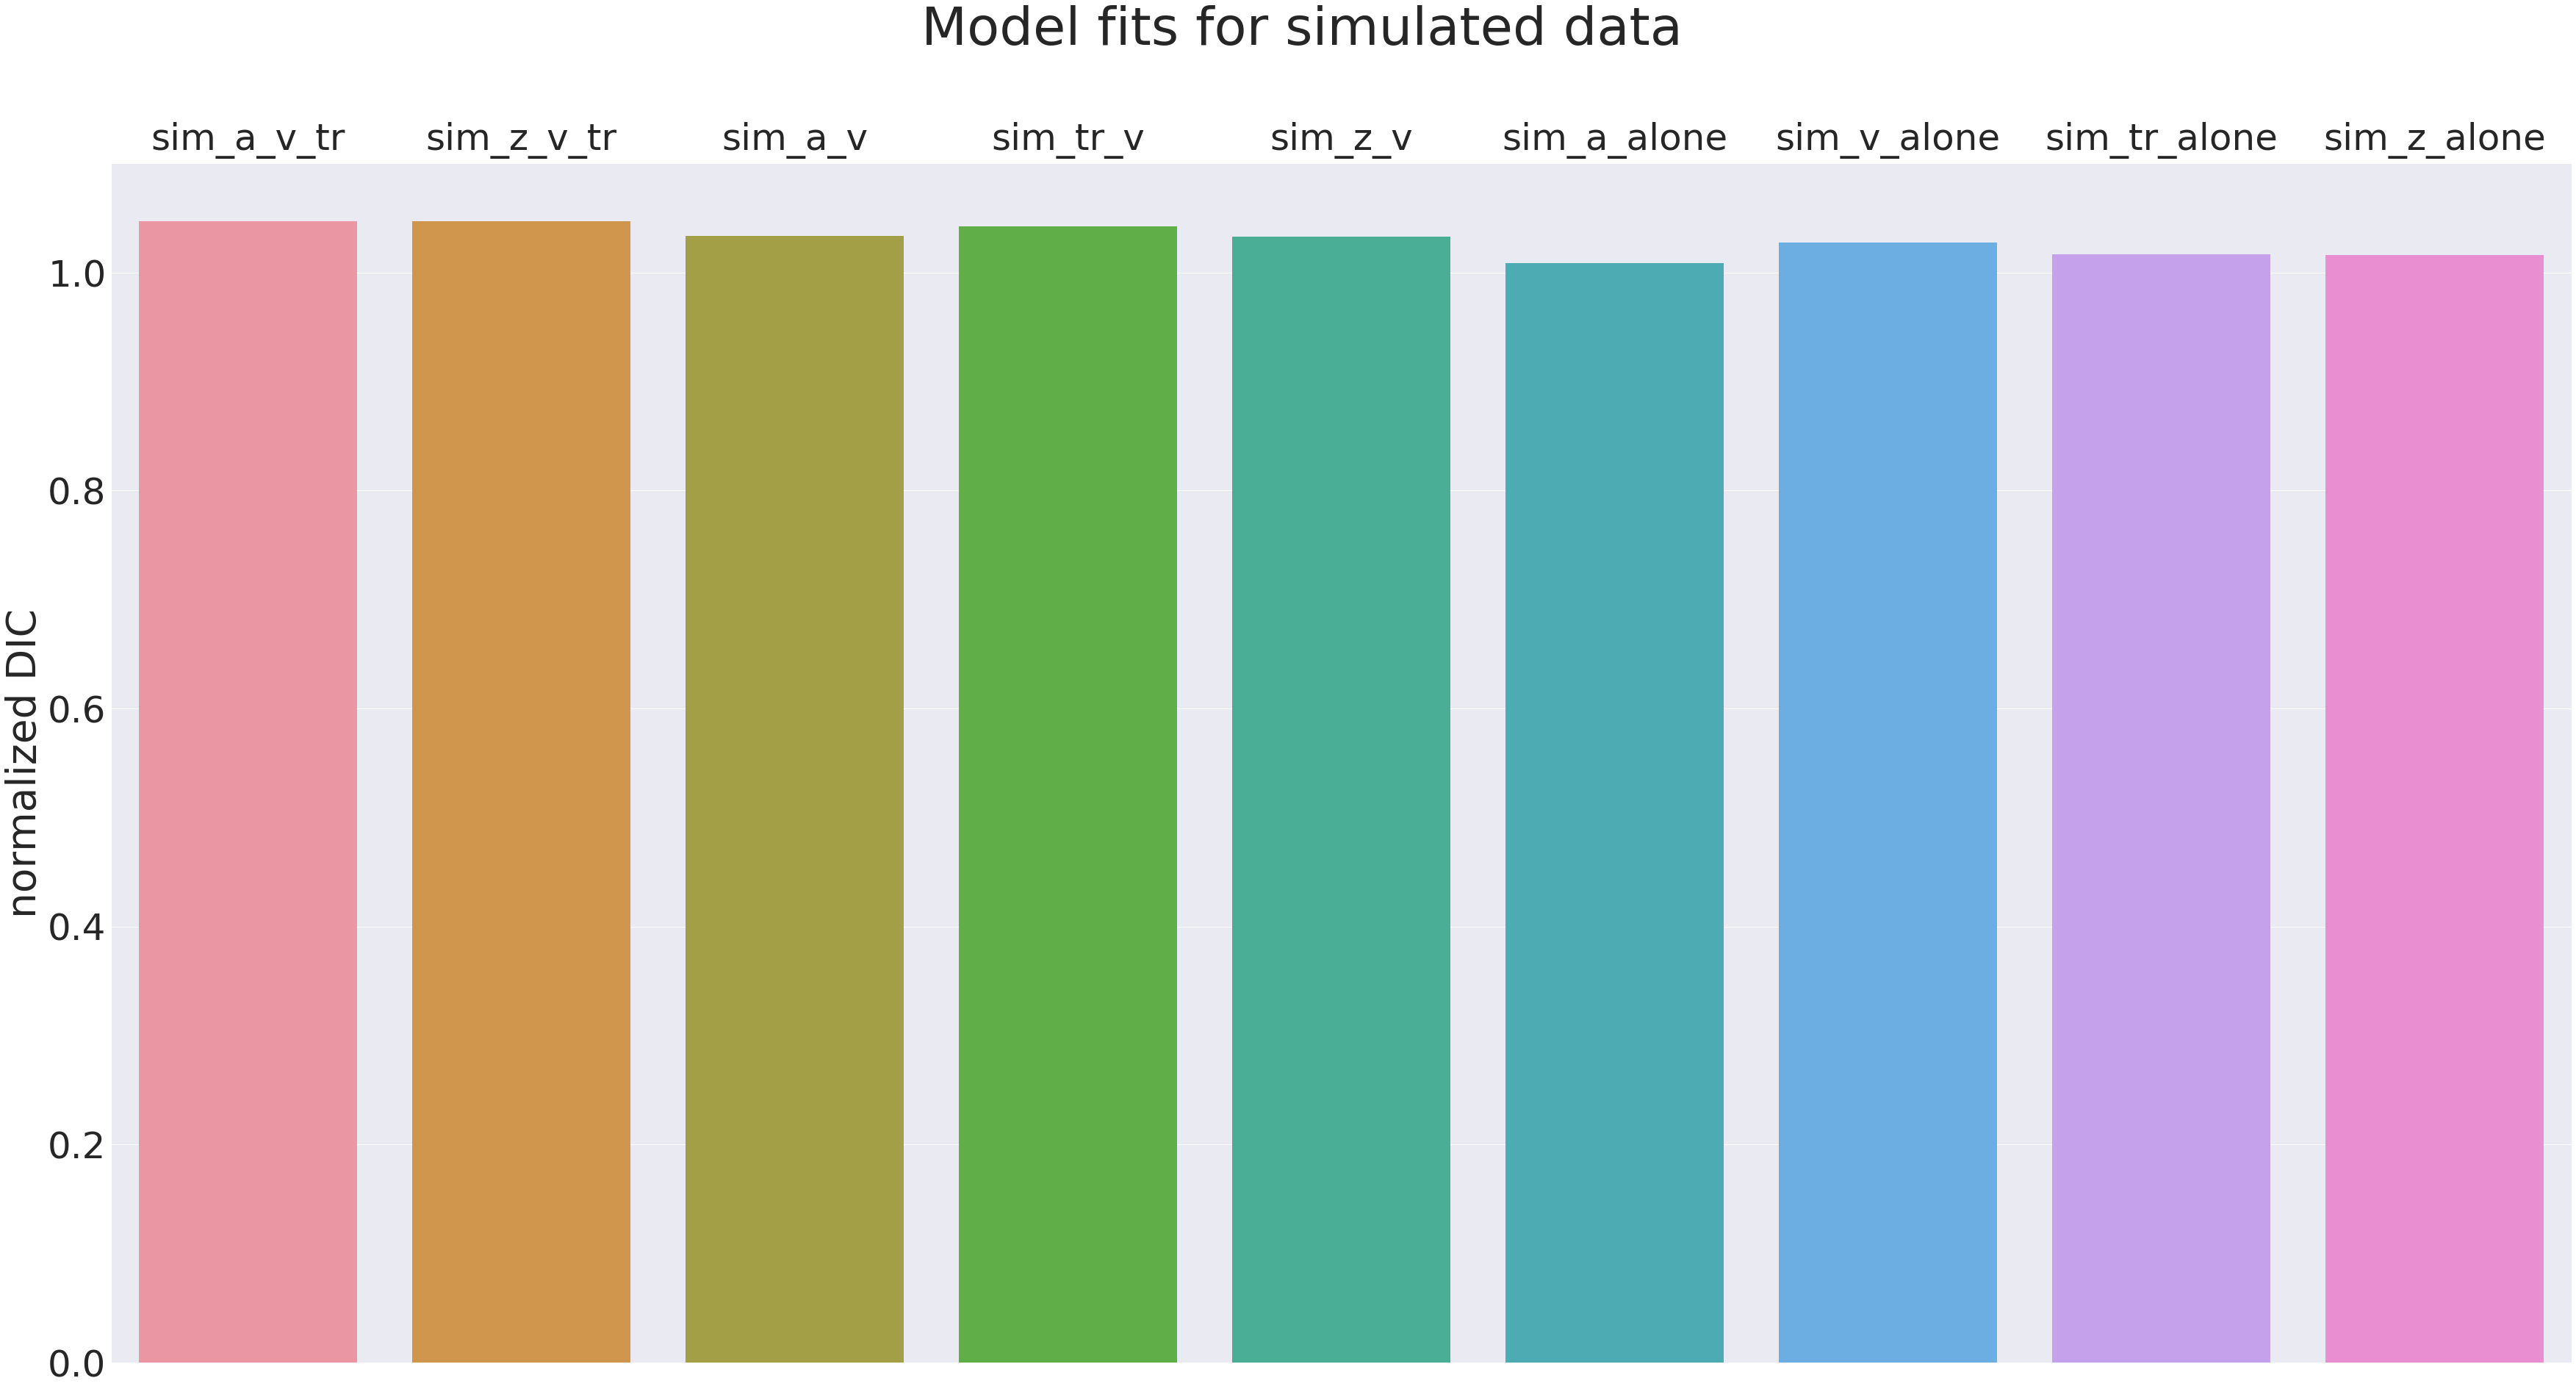

In [12]:
transformed_plotting_order = triple_param_model_names + dual_param_model_names + single_param_model_names 
sns.set(font_scale=5)  
plt.figure(figsize=(60,30))
ax=sns.barplot(data=flat_normalized_dics, order=transformed_plotting_order)
ax.set(ylabel='normalized DIC')
ax.xaxis.tick_top()
plt.suptitle('Model fits for simulated data')
plt.savefig(fig_dir+'normalized_sim_stepwise_dics.pdf')

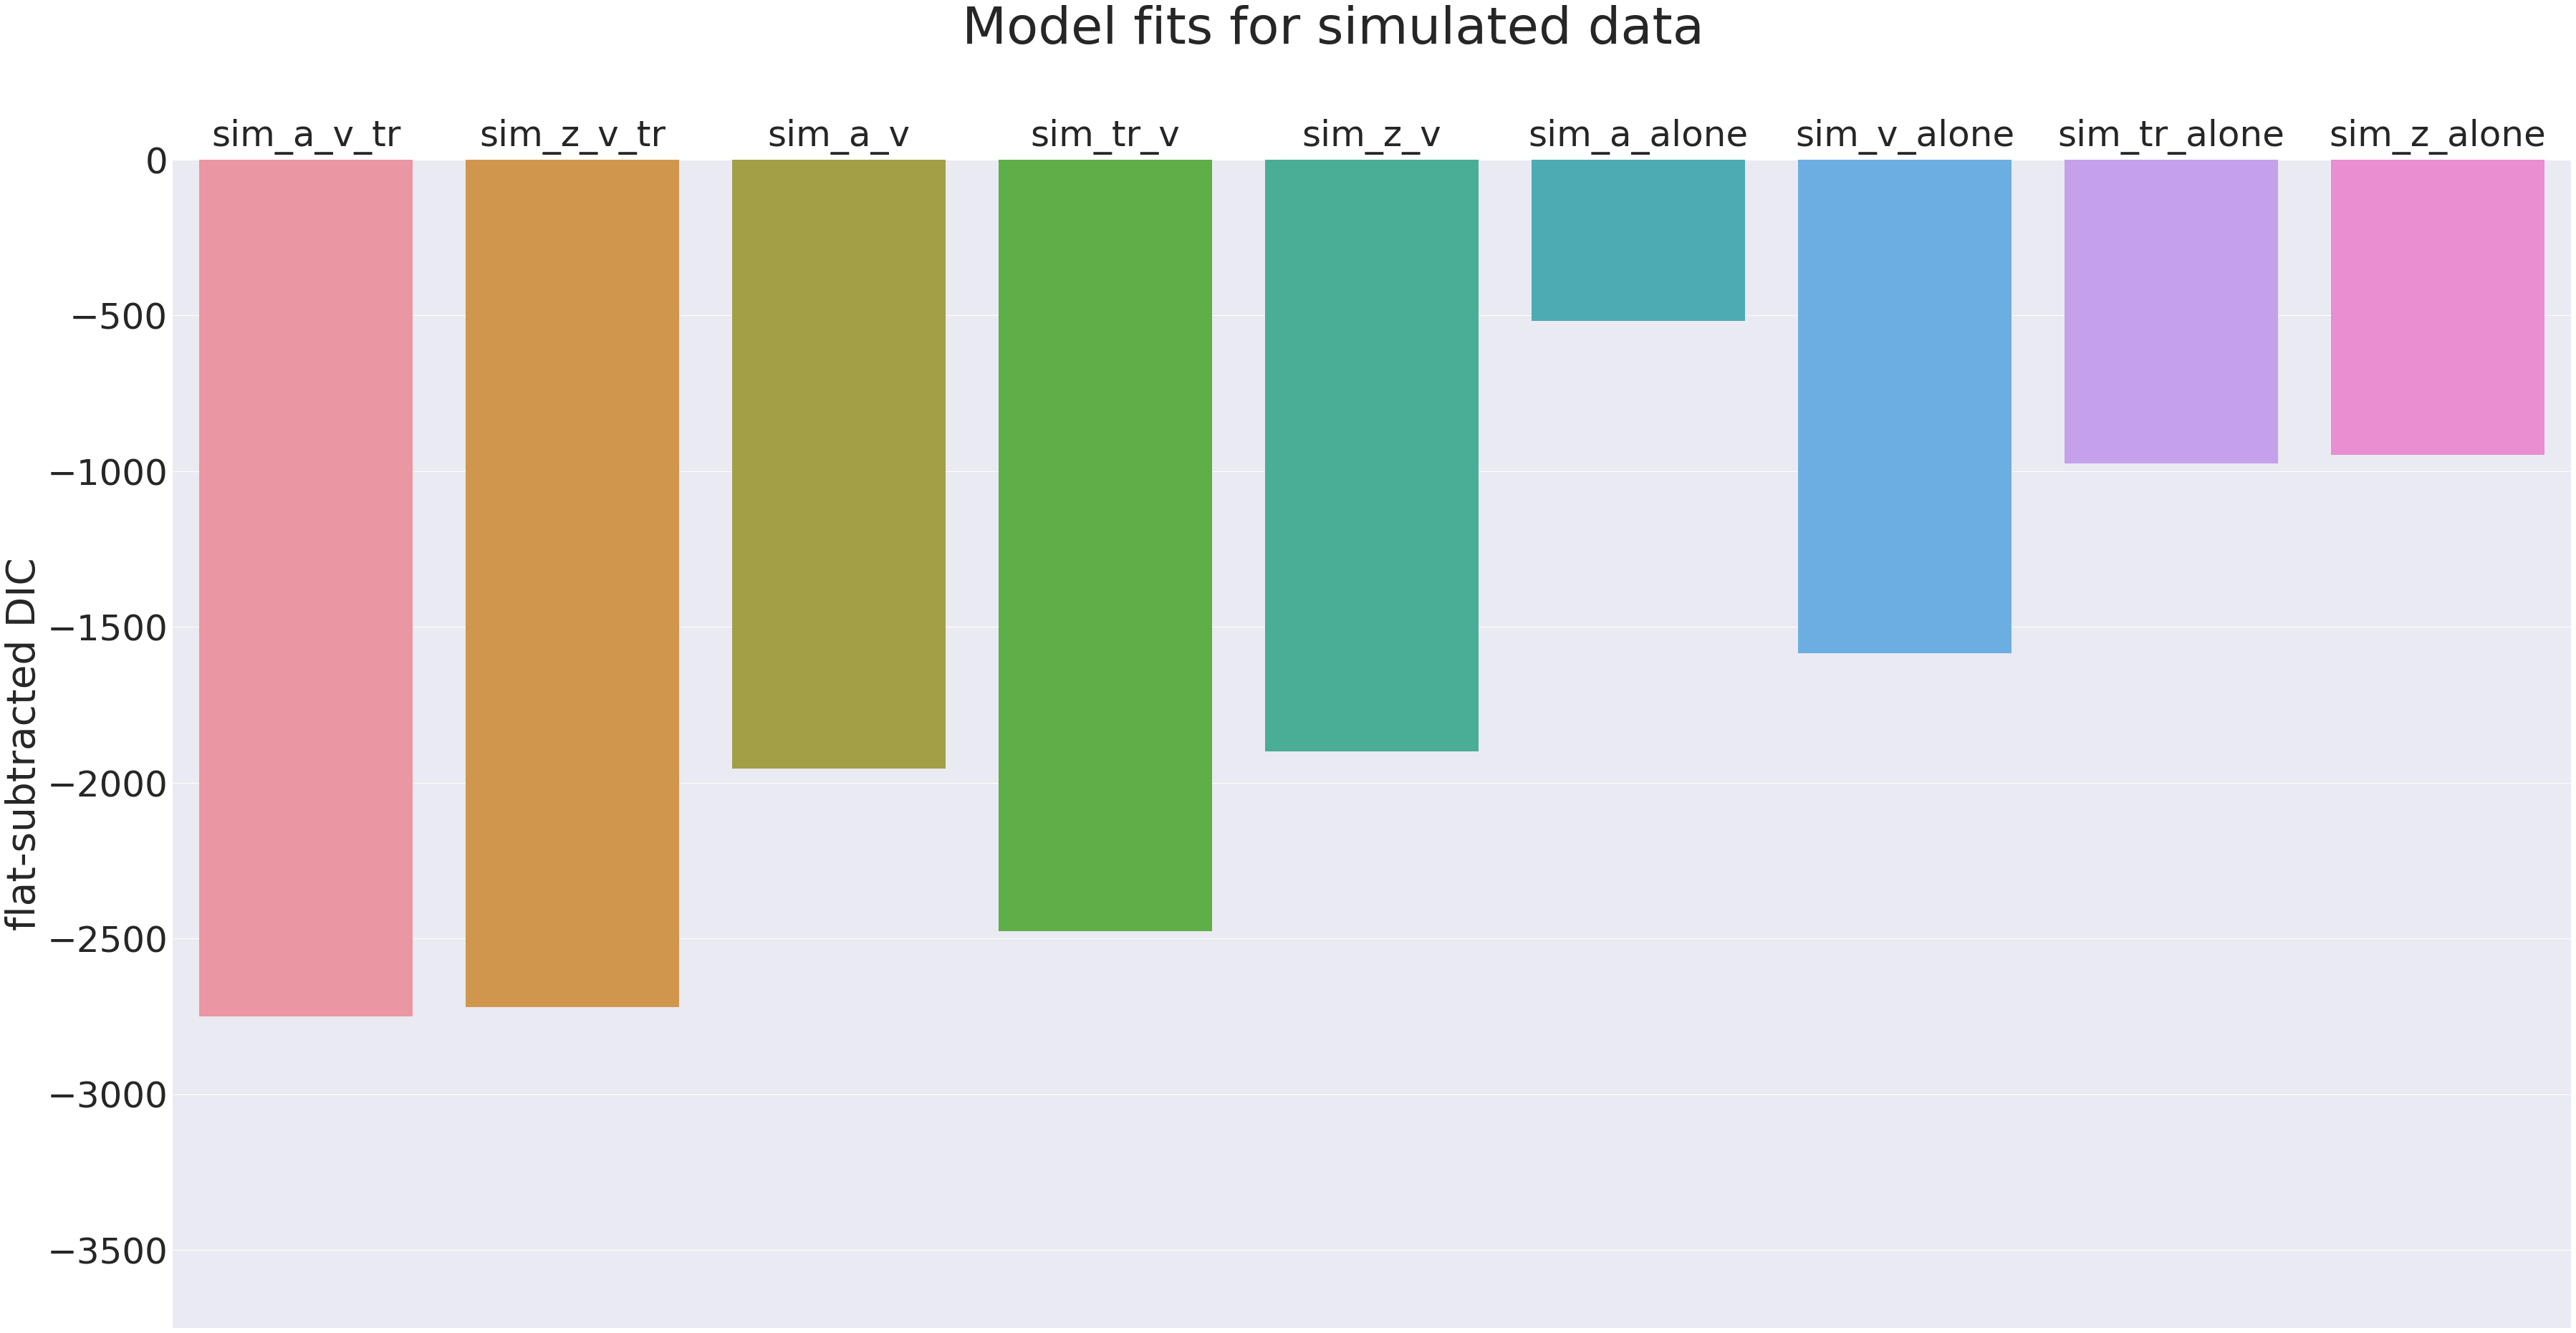

In [13]:
#need only v_tr containing models
sub_y_min = np.min(flat_subtracted_dics.values) - 1000
sub_y_max = 0

sns.set(font_scale=5)  
plt.figure(figsize=(60,30))
ax=sns.barplot(data=flat_subtracted_dics, order=transformed_plotting_order)
ax.set(ylabel='flat-subtracted DIC')
plt.ylim(sub_y_min, sub_y_max)
ax.xaxis.tick_top()
plt.suptitle('Model fits for simulated data')
plt.savefig(fig_dir+'subtracted_sim_stepwise_dics.pdf')

In [14]:
print(flat_subtracted_dics.sim_a_v_tr.values, flat_subtracted_dics.sim_z_v_tr.values)
flat_subtracted_dics.sim_a_v_tr - flat_subtracted_dics.sim_z_v_tr

[-2749.82664482] [-2720.35774647]


0   -29.468898
dtype: float64

## plot the posteriors for the winning model 

In [15]:
worst_model, winning_model = all_dics.idxmax(axis=1)[0], all_dics.idxmin(axis=1)[0]

print('worst_model: ', worst_model, '\nwinning_model: ', winning_model)

worst_model:  flat_model 
winning_model:  sim_a_v_tr


In [16]:
import hddm
winning_model=hddm.load(load_dir+winning_model+'_traces_winning')

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


### drift rate 

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 4320x2160 with 0 Axes>

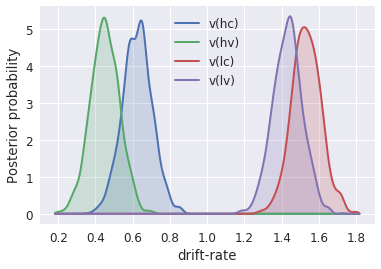

In [17]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))
v_hc, v_hv, v_lc, v_lv = winning_model.nodes_db.ix[['v(hc)', 'v(hv)', 'v(lc)', 'v(lv)'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.legend()
plt.savefig(fig_dir+'sim_drift_posterior_winning_model.pdf')

### threshold

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


<Figure size 4320x2160 with 0 Axes>

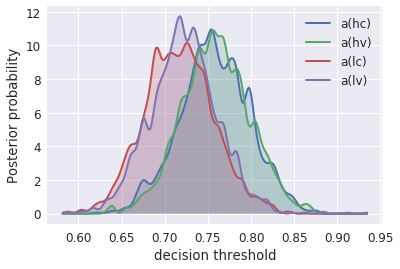

In [18]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))

a_hc, a_hv, a_lc, a_lv = winning_model.nodes_db.ix[['a(hc)', 'a(hv)', 'a(lc)', 'a(lv)'], 'node']


threshold_fig=hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
plt.xlabel('decision threshold')
plt.ylabel('Posterior probability')
plt.legend()
plt.savefig(fig_dir+'sim_threshold_posterior_winning_model.pdf')

### non-decision time

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


<Figure size 4320x2160 with 0 Axes>

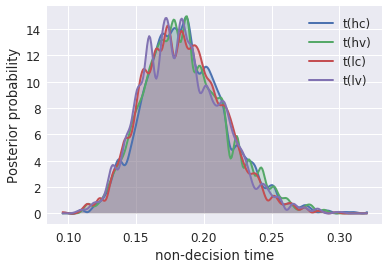

In [19]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))

tr_hc, tr_hv, tr_lc, tr_lv = winning_model.nodes_db.ix[['t(hc)', 't(hv)', 't(lc)', 't(lv)'], 'node']


ndt_fig=hddm.analyze.plot_posterior_nodes([tr_hc, tr_hv, tr_lc, tr_lv])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.legend()
plt.savefig(fig_dir+'sim_ndt_posterior_winning_model.pdf')

In [20]:
# tst hyp. that bound ^ with vol
print("P(HV > LV) = ", (a_hv.trace() > a_lv.trace()).mean())
# tst hyp. that drift increases in lc 
print("P(LC > HC) = ", (v_lc.trace() > v_hc.trace()).mean())

P(HV > LV) =  0.7564
P(LC > HC) =  1.0


### Look at the rt fits for the winning model. 

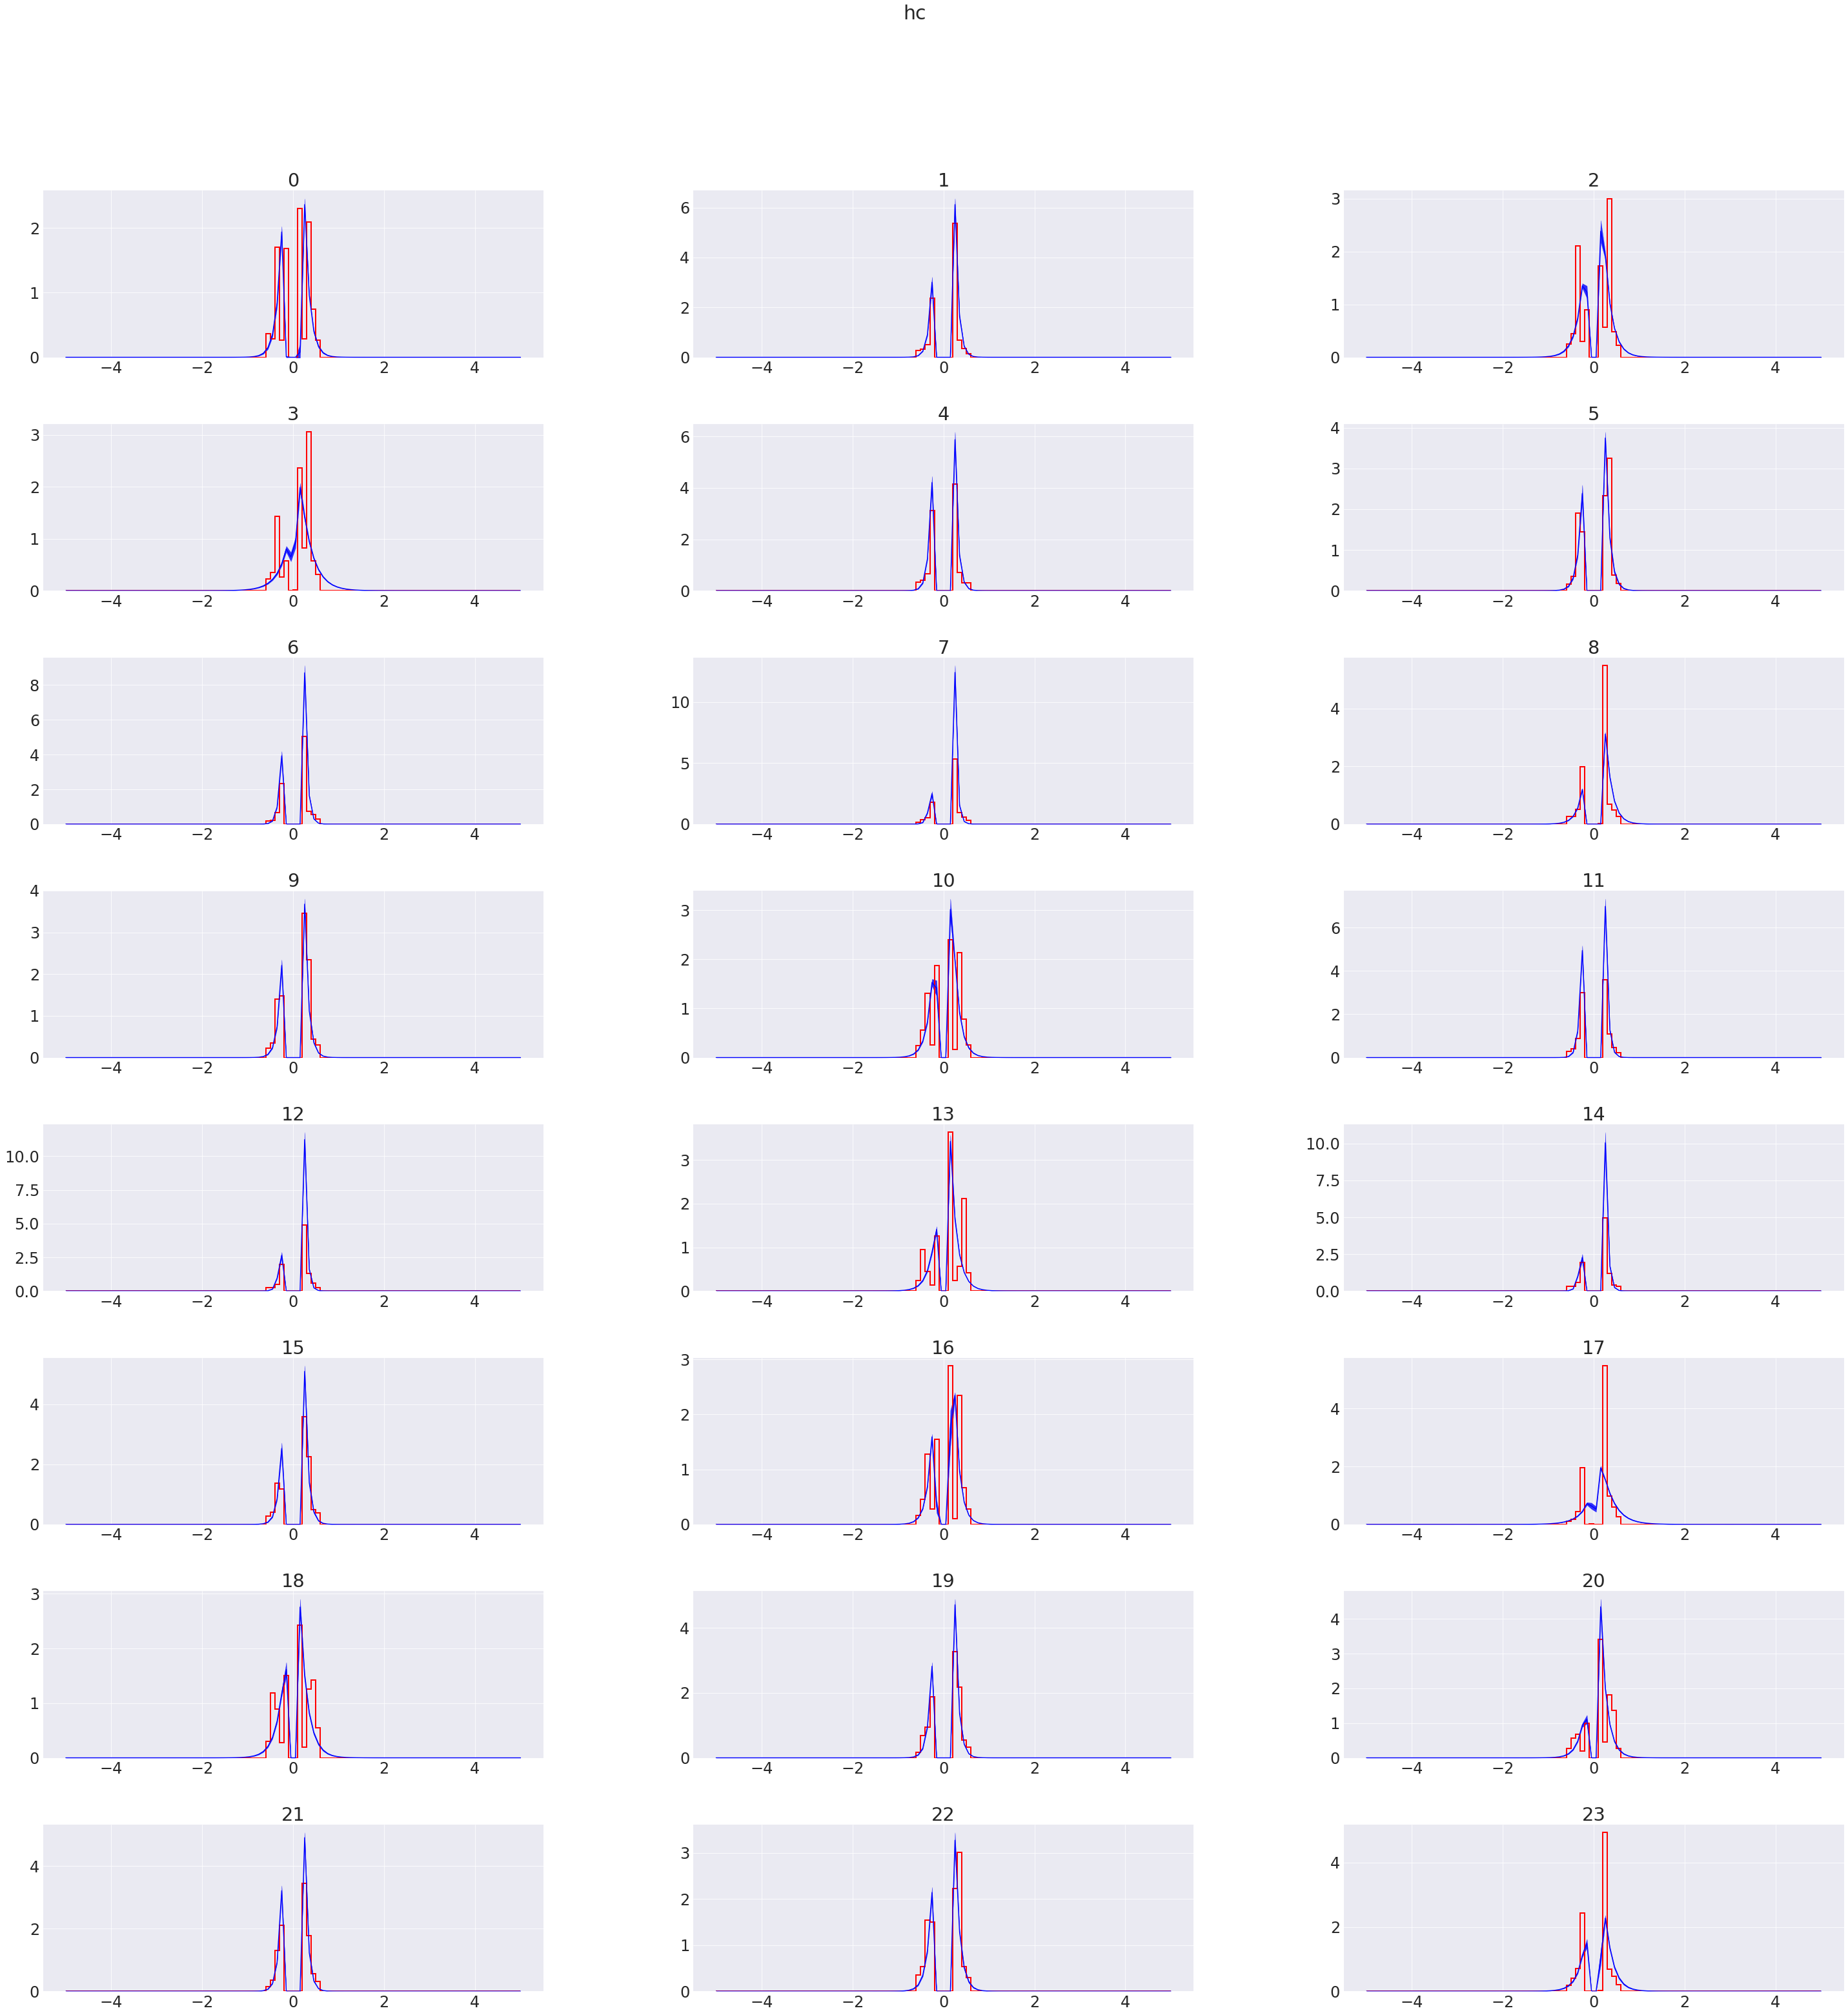

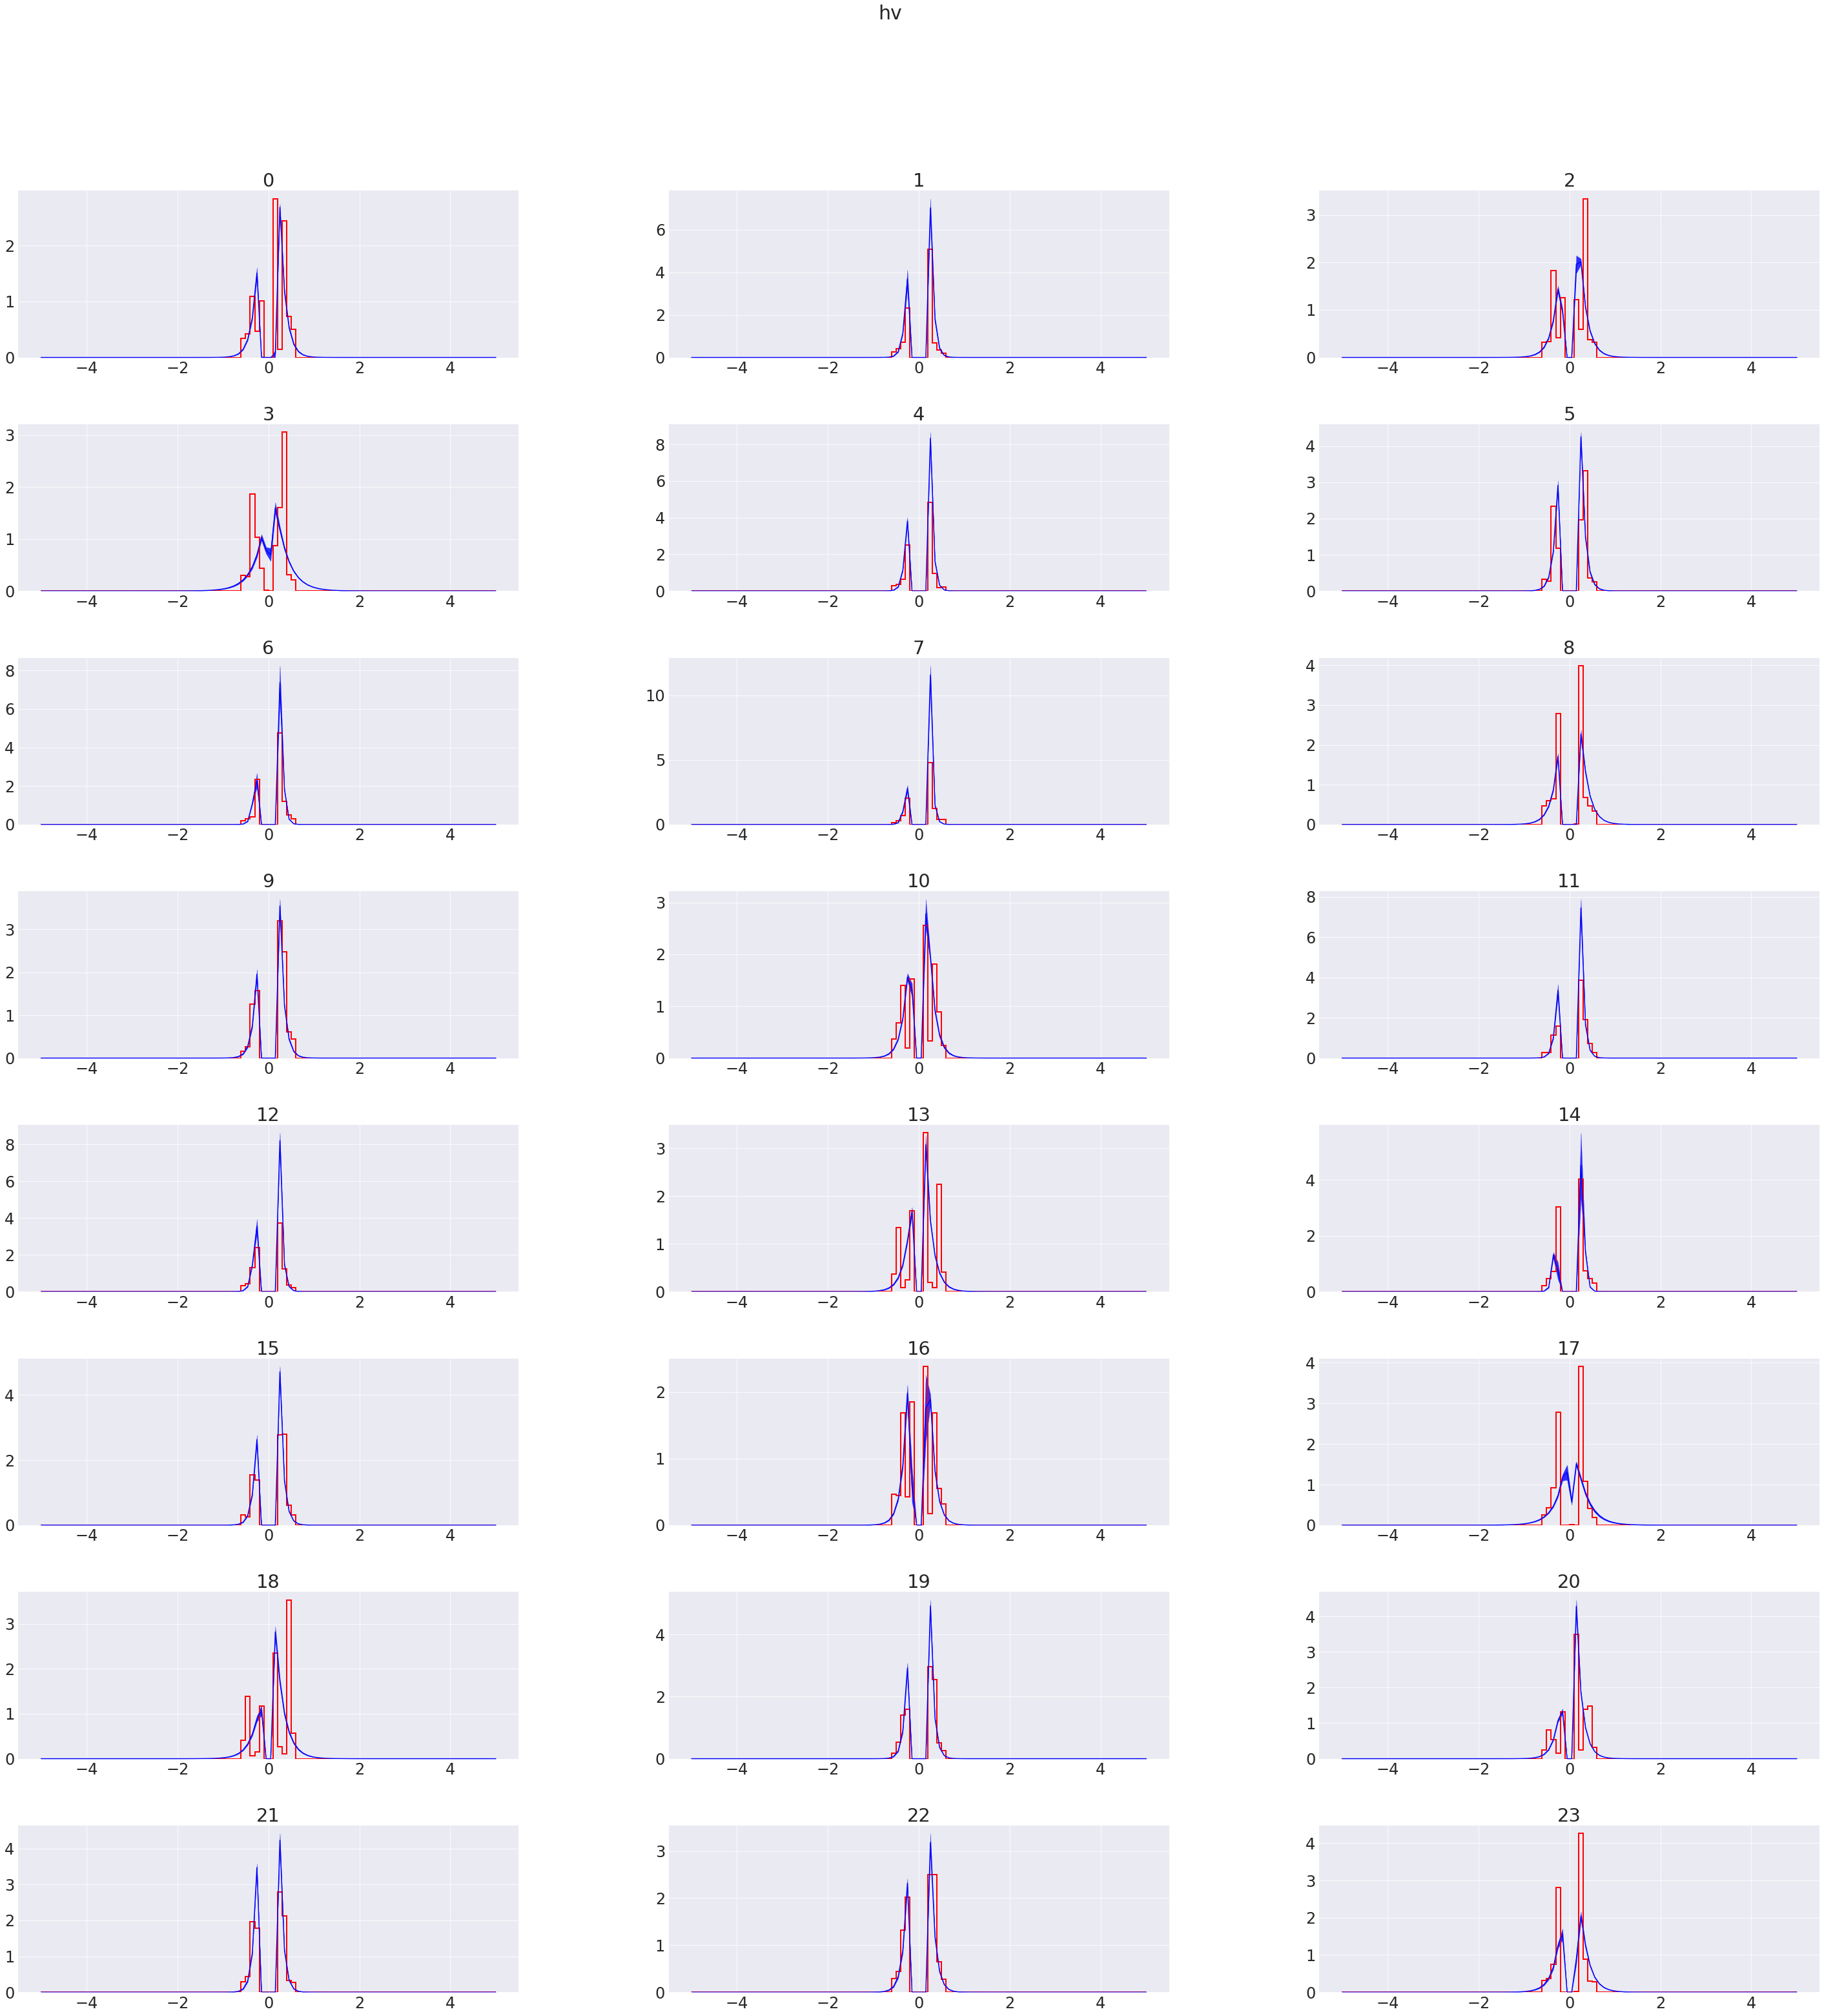

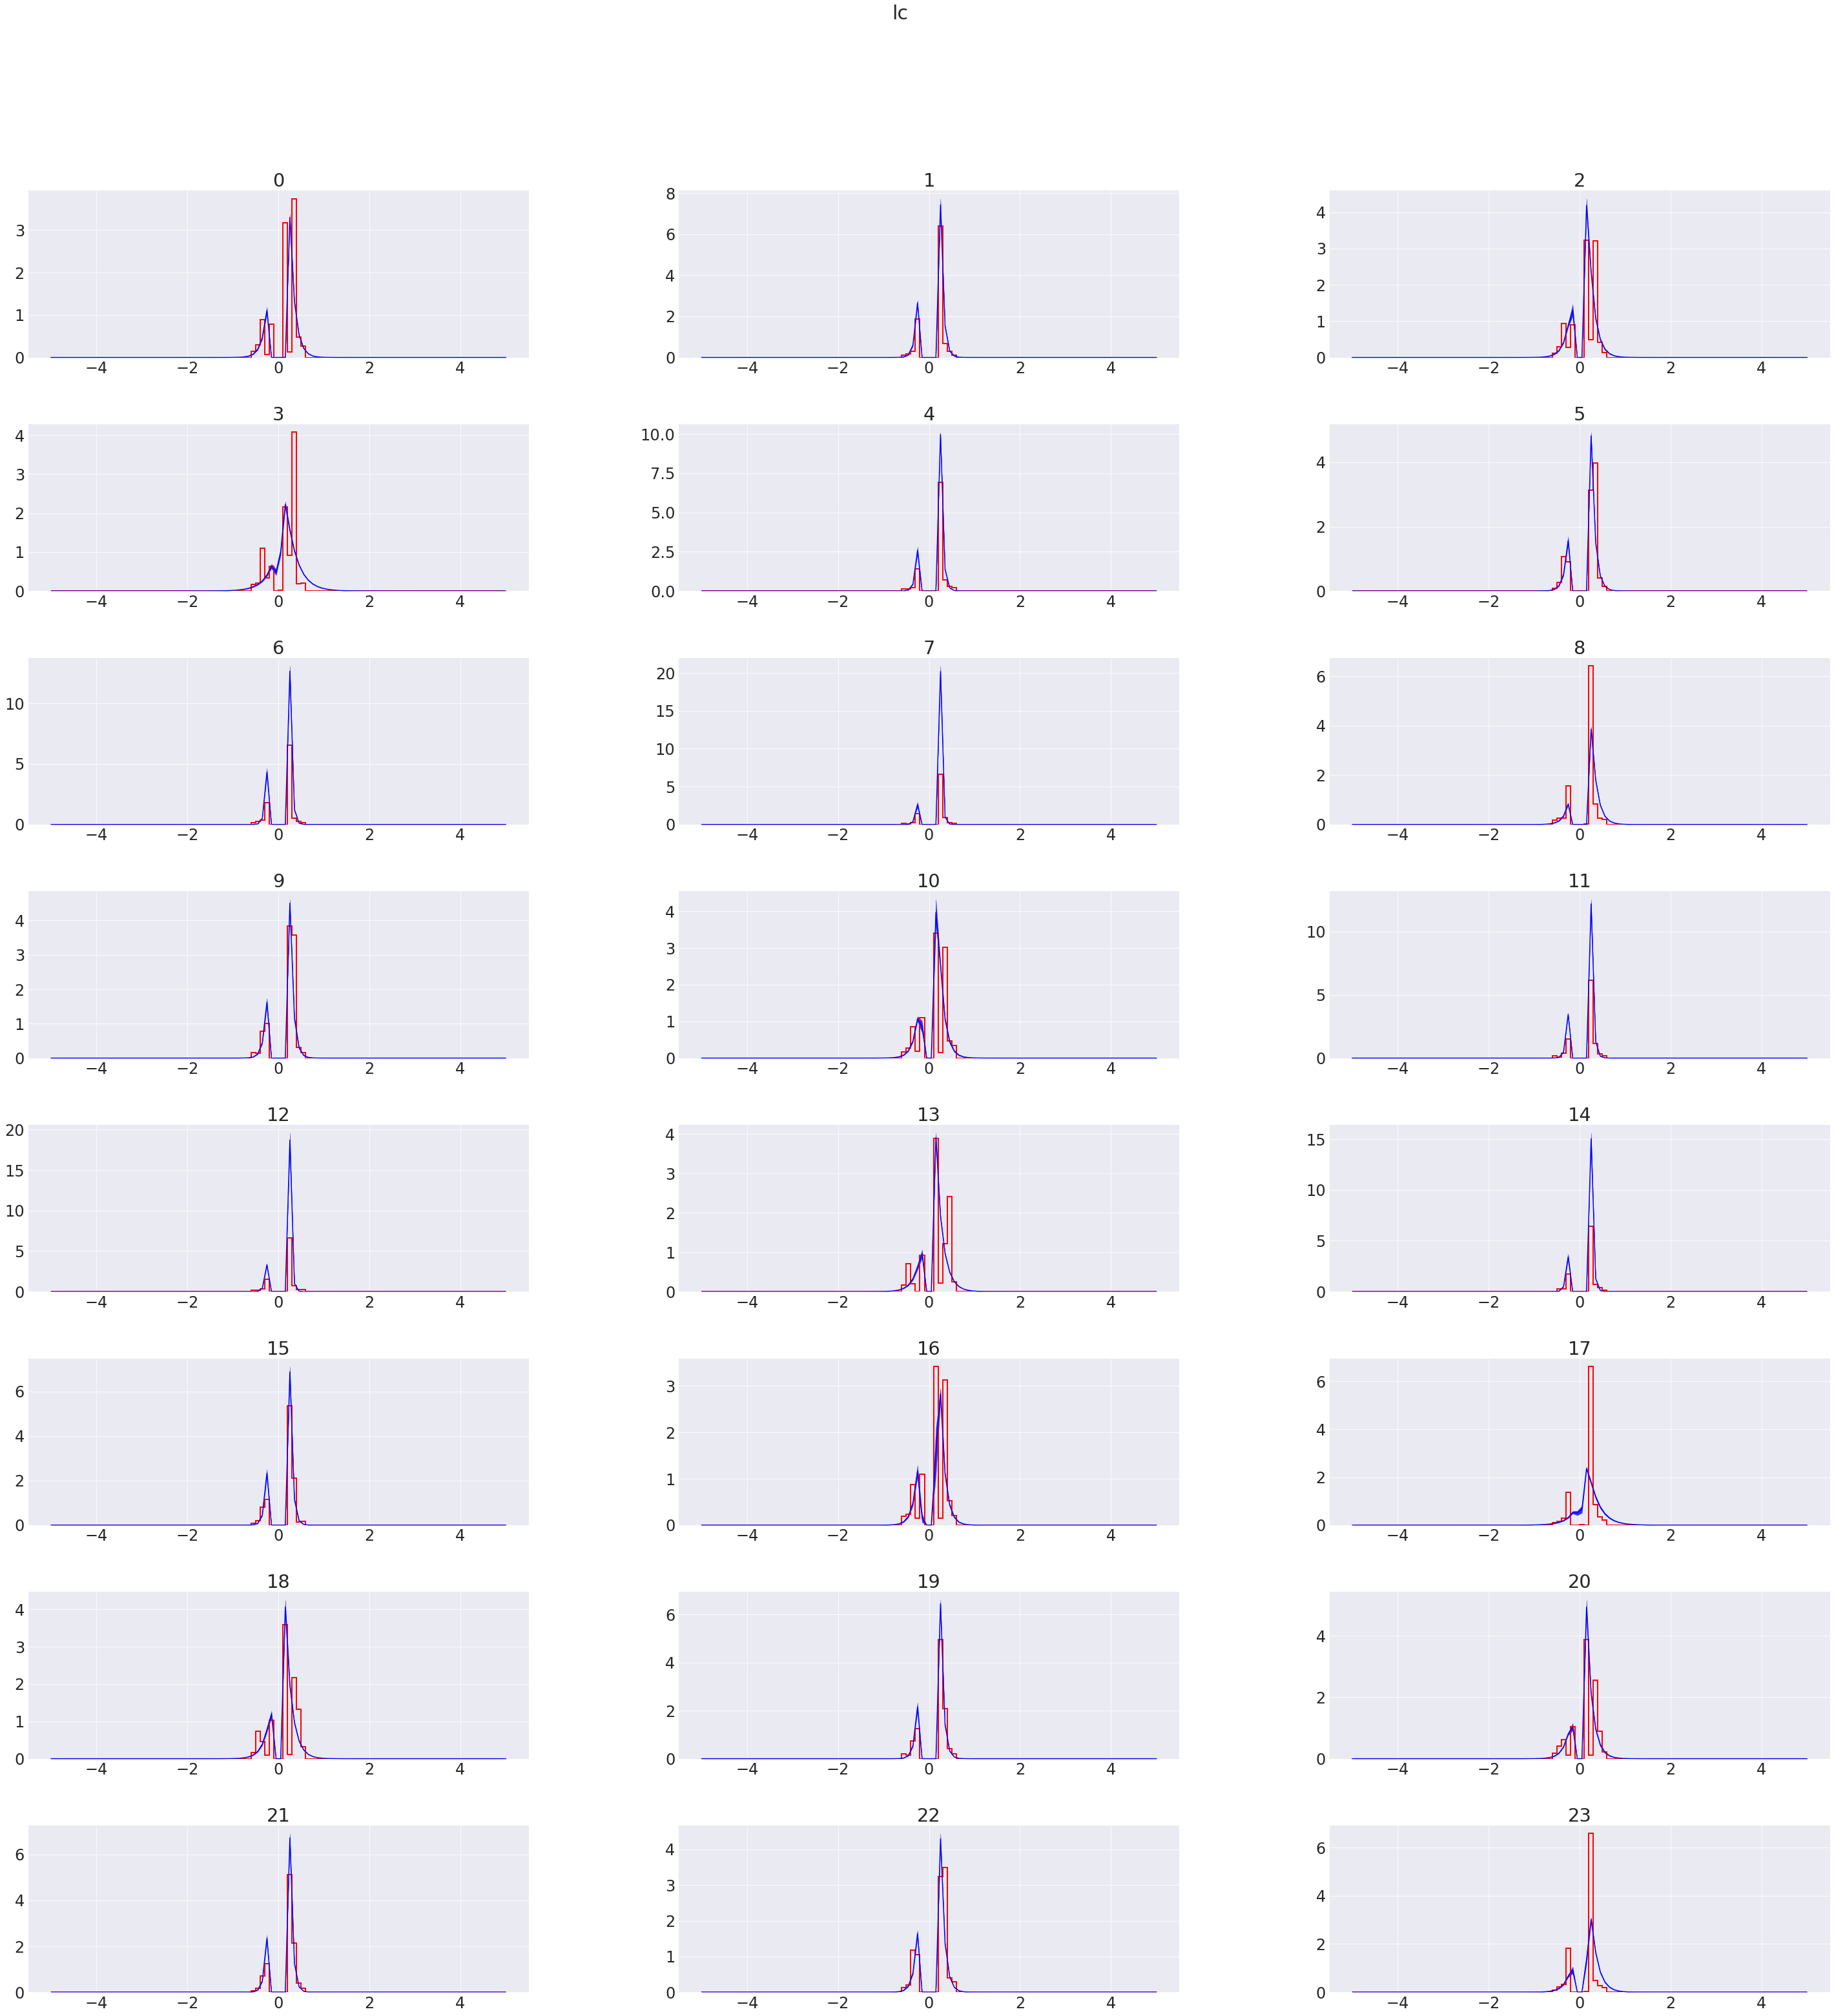

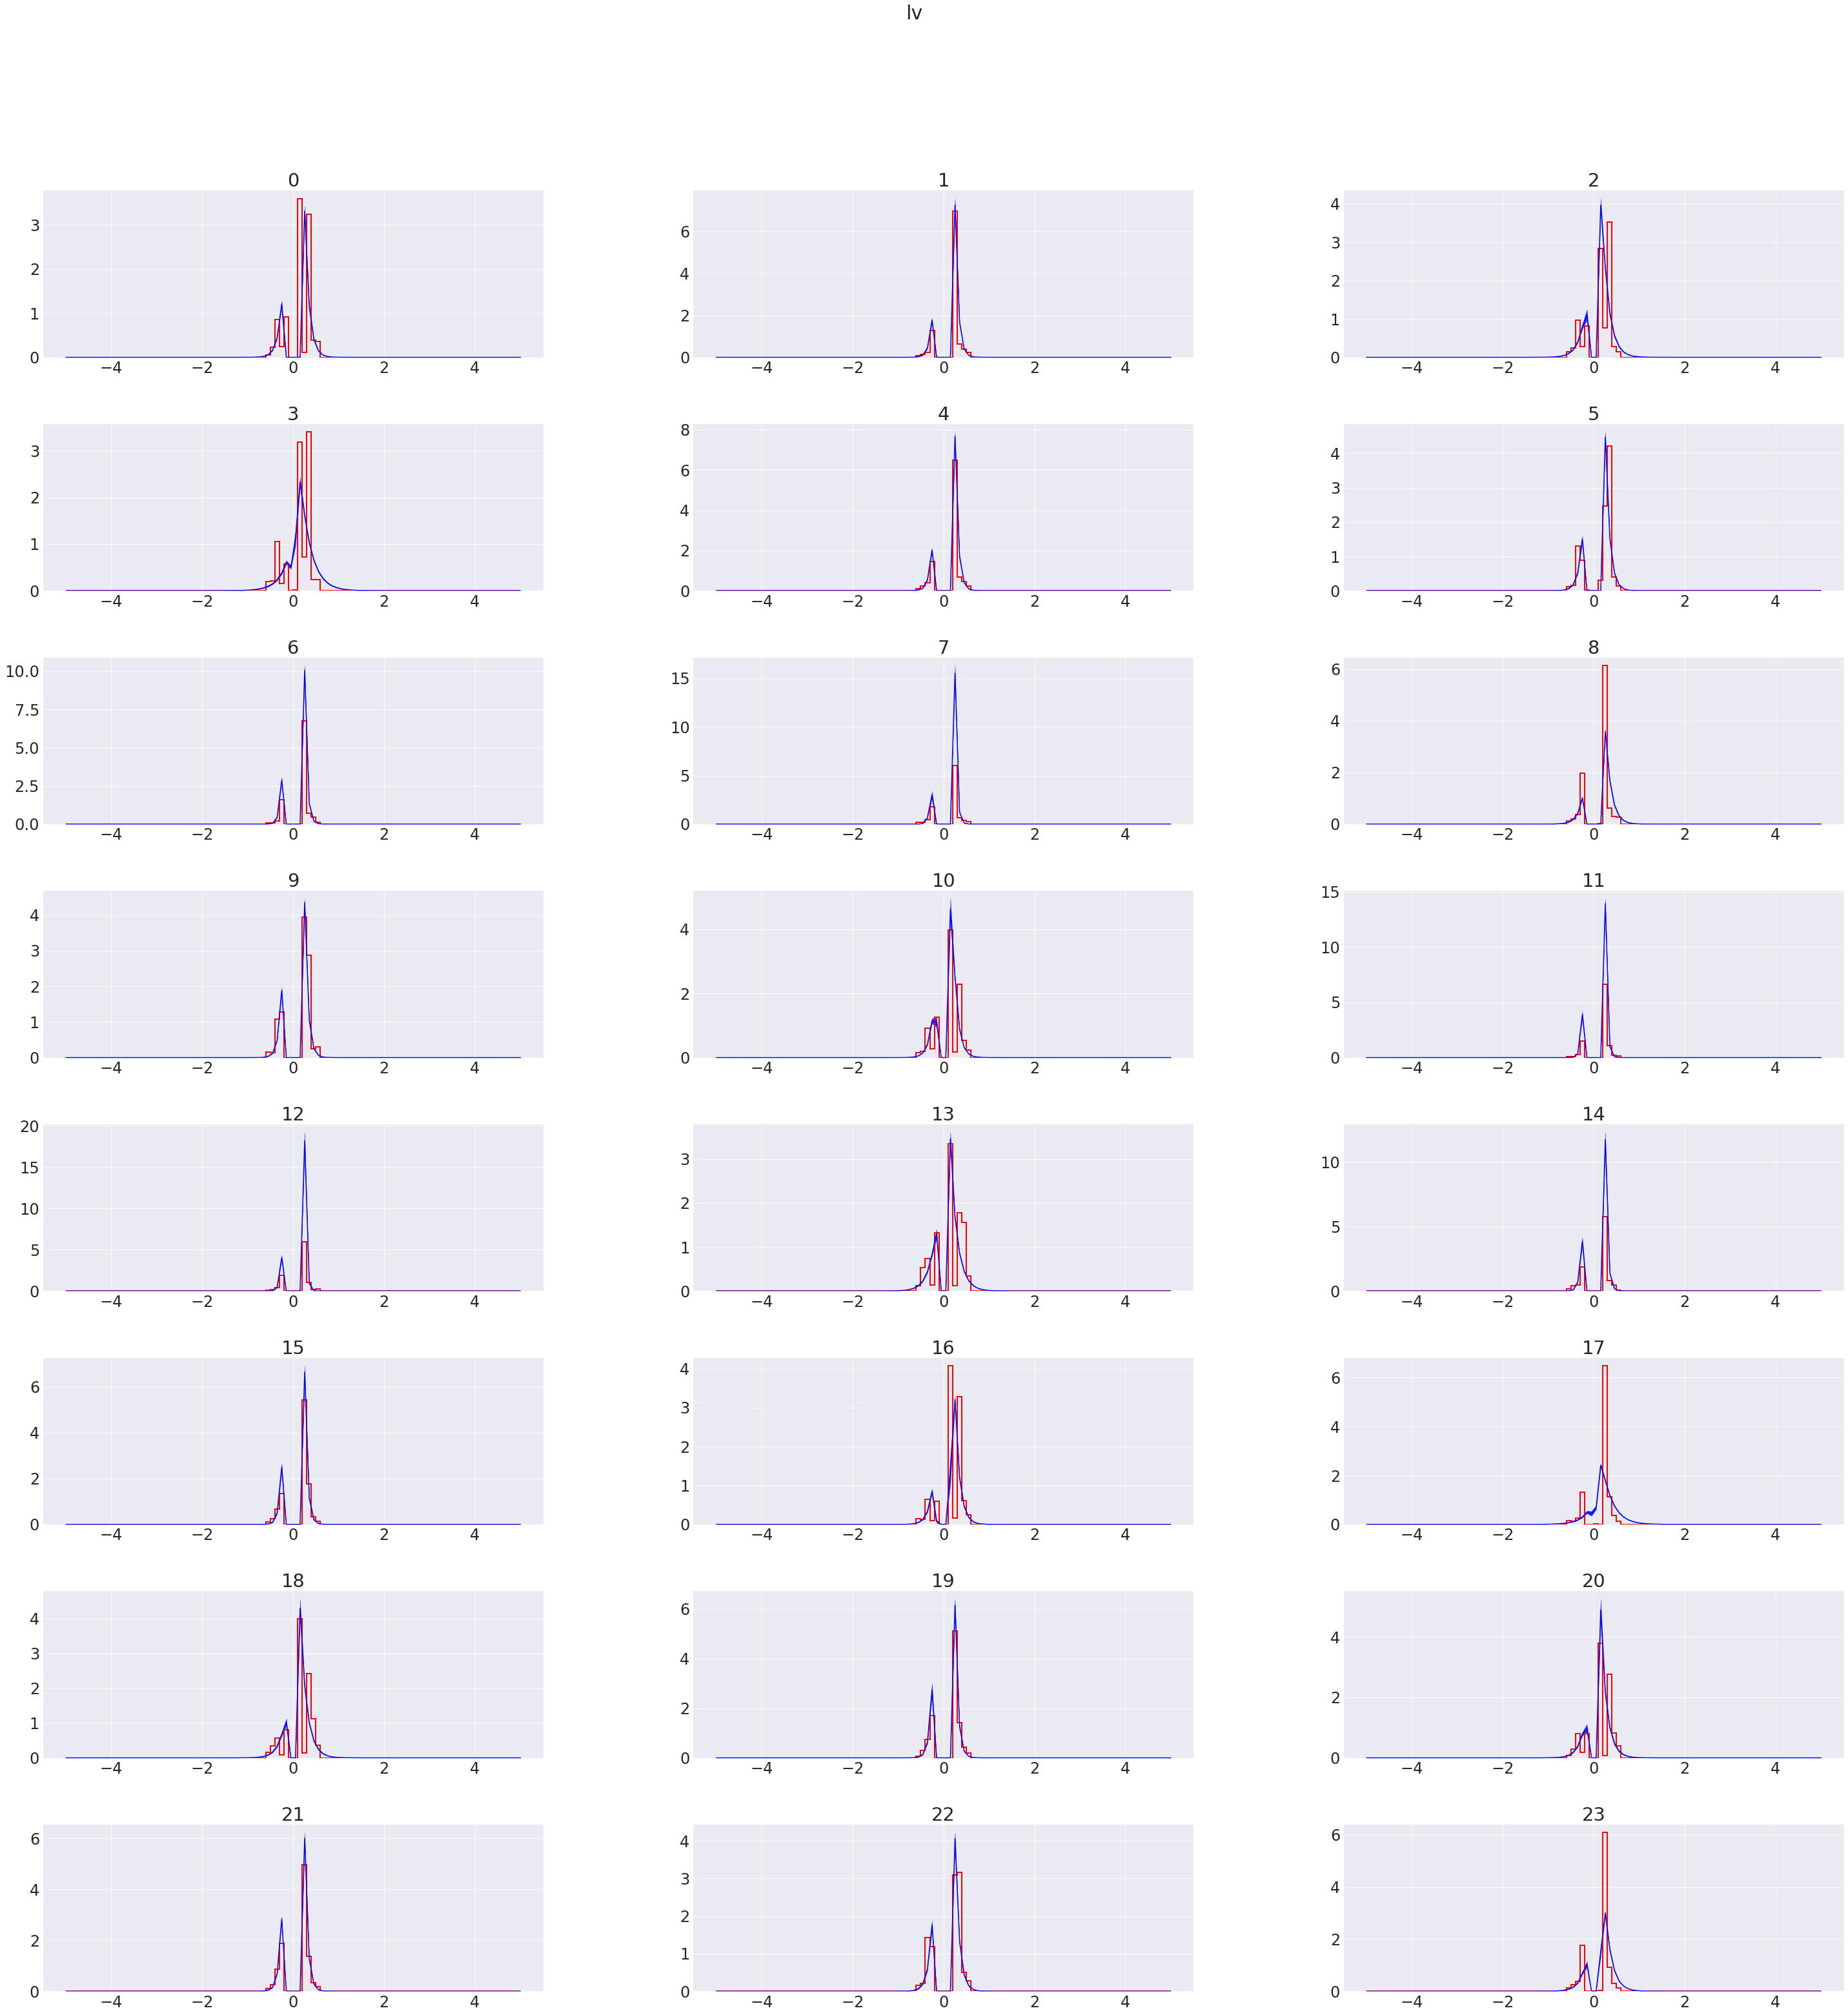

In [35]:
sns.set_context("paper", font_scale=3)
winning_model.plot_posterior_predictive(figsize=(50,50))